In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Preprocessing

In [2]:
data=pd.read_csv('car.csv')

In [3]:
data.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [4]:
data.shape

(892, 6)

In [5]:
data=data.rename(columns={'year':'Model'})

In [6]:
data.head()

,name,company,Model,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   Model       892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [8]:
## Checking for Unique Values
dict={}
for i in list(data.columns):
    dict[i]=data[i].unique().shape[0]
unique_data=pd.DataFrame(dict,index=['Unique Count']).transpose()

In [9]:
unique_data

,Unique Count
name,525
company,48
Model,61
Price,274
kms_driven,259
fuel_type,4


In [10]:
data.isnull().mean()

name          0.000000
company       0.000000
Model         0.000000
Price         0.000000
kms_driven    0.058296
fuel_type     0.061659
dtype: float64

In [11]:
data['fuel_type'].value_counts()

Petrol    440
Diesel    395
LPG         2
Name: fuel_type, dtype: int64

<AxesSubplot:>

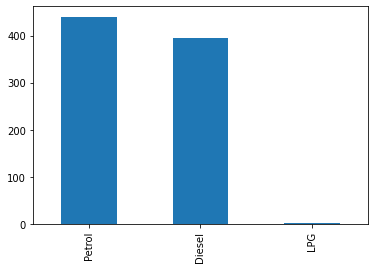

In [12]:
data['fuel_type'].value_counts().plot(kind='bar')

In [13]:
##we can replace missing values in fuel_type column with petrol4
data['fuel_type']=data['fuel_type'].fillna('Petrol')

In [14]:
## we can drop kms driven values as it is only 5 %
data.dropna(inplace=True)

In [15]:
data.isnull().sum()

name          0
company       0
Model         0
Price         0
kms_driven    0
fuel_type     0
dtype: int64

In [16]:
data.dtypes

name          object
company       object
Model         object
Price         object
kms_driven    object
fuel_type     object
dtype: object

In [17]:
data['kms_driven']=data['kms_driven'].map(lambda x:x.replace(',',''))
data[data['kms_driven'] == 'Petrol']
data.drop([890,891],inplace=True)

In [18]:
data['kms_driven']=data["kms_driven"].astype(str).map(lambda x : x.split(' ')[0]).astype(int)

In [19]:
data['kms_driven']

0       45000
1          40
2       22000
3       28000
4       36000
        ...  
883     50000
885     30000
886    132000
888     27000
889     40000
Name: kms_driven, Length: 838, dtype: int32

In [20]:
data['Price']=data['Price'].astype(str).map(lambda x:x.replace(',',''))

In [21]:
data=data.mask(data['Price']=='Ask For Price', np.nan)

In [22]:
data.dropna(inplace=True)

In [23]:
data['Price']=data['Price'].astype(int)

In [24]:
data['name']=data['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

In [25]:
data['Model']=data['Model'].astype(int)

In [26]:
data=data.reset_index(drop=True)

In [27]:
data.shape

(817, 6)

In [28]:
data.dtypes

name           object
company        object
Model           int32
Price           int32
kms_driven    float64
fuel_type      object
dtype: object

In [29]:
data

,name,company,Model,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000.0,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40.0,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000.0,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000.0,Diesel
4,Ford Figo,Ford,2012,175000,41000.0,Diesel
...,...,...,...,...,...,...
812,Maruti Suzuki Ritz,Maruti,2011,270000,50000.0,Petrol
813,Tata Indica V2,Tata,2009,110000,30000.0,Diesel
814,Toyota Corolla Altis,Toyota,2009,300000,132000.0,Petrol
815,Tata Zest XM,Tata,2018,260000,27000.0,Diesel


In [30]:
data.to_csv('cleaned_data.csv',index=False)

## Data Visualization

Text(0, 0.5, 'Price')

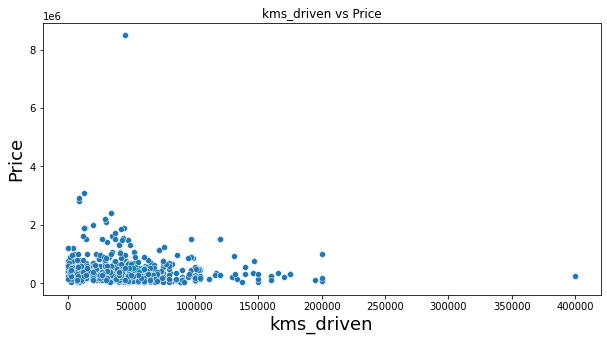

In [31]:
## Lets See the kms_driven Vs Price
plt.figure(figsize=(10,5))
sns.scatterplot(x=data['kms_driven'],
               y=data['Price'],
               )
plt.title('kms_driven vs Price')
plt.xlabel('kms_driven',fontsize=18)
plt.ylabel('Price',fontsize=18)

Text(0, 0.5, 'Price')

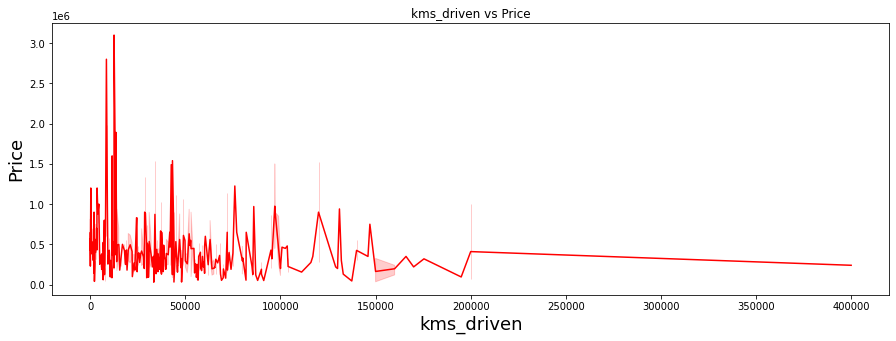

In [32]:
plt.figure(figsize=(15,5))
sns.lineplot(x=data['kms_driven'],
            y=data['Price'],
            color='red',
            )
plt.title('kms_driven vs Price')
plt.xlabel('kms_driven',fontsize=18)
plt.ylabel('Price',fontsize=18)

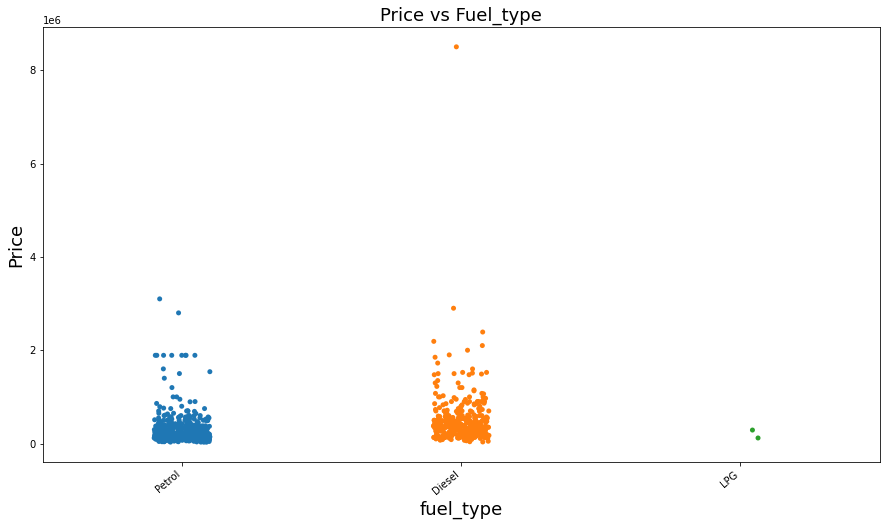

In [33]:
plt.subplots(figsize=(15,8))
ax=sns.stripplot(x='fuel_type',y='Price',data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.xlabel('fuel_type',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.title('Price vs Fuel_type',fontsize=18)
plt.show()

##  Model

In [34]:
## Separating the dependent ansd independent features
x=data.drop('Price',axis=1) ## independent variable
y=data['Price']              ## dependent variable

In [35]:
## Lets do train_test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [36]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [37]:
ohe=OneHotEncoder()
ohe.fit(x[['name','company','fuel_type']])

OneHotEncoder()

In [38]:
column_trans=make_column_transformer((StandardScaler(), ['Model','kms_driven']),
                                      (OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

In [39]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [40]:
pipe=make_pipeline(column_trans,lr)

In [41]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['Model', 'kms_driven']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswage

In [42]:
y_pred=pipe.predict(X_test)

In [43]:
pipe.score(X_train,y_train)

0.7622271624442364

In [44]:
pipe.score(X_test,y_test)

0.20567712254498538

In [45]:
r2_score(y_pred,y_test)

0.2474483029549791

In [46]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [47]:
np.argmax(scores)

338

In [48]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.9377687958464904

In [49]:
import pickle
pickle.dump(pipe,open('LinearRegression.pkl','wb'))

In [50]:
pickle.dump(data,open('car_list.pkl','wb'))

In [51]:
pipe.predict(pd.DataFrame(columns=['name','company','Model','kms_driven','fuel_type'],data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([421206.70026384])

In [55]:
def encoder_car(car_name):
    ohe=OneHotEncoder()
    ohe.fit([[car_name]])
    column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),[car_name]),
                                    remainder='passthrough')
    column_transform=column_trans.fit_transform([[car_name]])
    return column_transform

In [56]:
encoder_car('Ford Figo')

ValueError: Specifying the columns using strings is only supported for pandas DataFrames